## Preprocessing of images: 

1. Resize images: from dimension 540x540 to 256x256
2. Normalize pixel values: Chosen range is 0 to 1
3. Data Augmentation: random rotations, flips, zooms, shifts, etc.
4. Convert to Tensors: necessary to be accepted as inputs for model training

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [11]:
# Function for image preprocessing with visualization
def preprocess_image_with_visualization(image_path, target_size=( 256, 256)):
    # Read the original image using OpenCV
    original_img = cv2.imread(image_path)
    
    # Resize the image to the target size
    resized_img = cv2.resize(original_img, target_size)
    
    # Convert image to float32 and normalize pixel values to [0, 1]
    normalized_img = resized_img.astype(np.float32) / 255.0
    
    # Transpose the image to match model input shape (optional, depending on the model requirements)
    normalized_img = np.transpose(normalized_img, (2, 0, 1))  # Channels-first for PyTorch or TensorFlow
    
    # Convert the image to a tensor
    img_tensor = np.expand_dims(normalized_img, axis=0)  # Add batch dimension

    # Display original and preprocessed images side by side
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Preprocessed Image')
    plt.imshow(np.transpose(normalized_img, (1, 2, 0)))  # Transpose back for display
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    

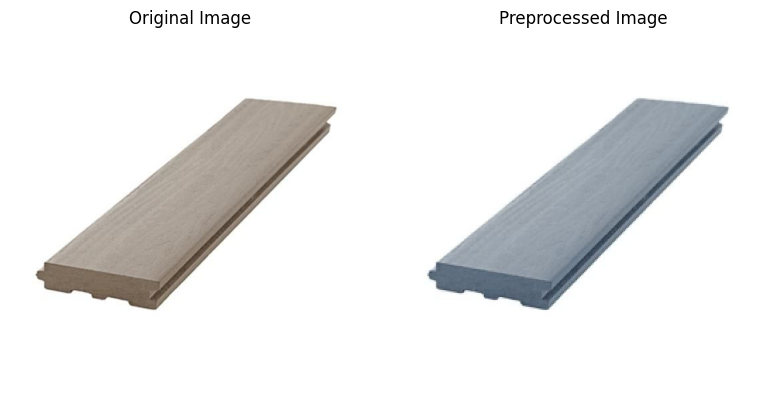

In [12]:
#Example usage
image_path = '/home/sklaptop/Downloads/OneDrive_2023-12-18/P25 - Visual Search/Subset/building-materials_decking-railing_aeratis78x318x12heritagetonguegrooveporchflooringweatheredwood.jpg'
processed_image = preprocess_image_with_visualization(image_path, target_size=(256,256))

In [28]:
# Function for image preprocessing and saving tensors
def preprocess_and_save_images(folder_path, save_path, batch_size=32, target_size=(256, 256)):
    image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path)
                   if filename.endswith(('.jpg', '.png', '.jpeg'))]  # List of image paths
    
    num_images = len(image_paths)
    num_batches = (num_images + batch_size - 1) // batch_size  # Calculate the number of batches
    
    os.makedirs(save_path, exist_ok=True)  # Create the save directory if it doesn't exist
    
    # Initialize tqdm progress bar
    pbar = tqdm(total=num_batches, desc='Preprocessing Images', unit='batch')
    
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, num_images)
        
        batch_image_paths = image_paths[start_idx:end_idx]
        batch_images = []
        
        for image_path in batch_image_paths:
            # Read the original image using OpenCV
            original_img = cv2.imread(image_path)
            
            # Resize the image to the target size
            resized_img = cv2.resize(original_img, target_size)
            
            # Convert image to float32 and normalize pixel values to [0, 1]
            normalized_img = resized_img.astype(np.float32) / 255.0
            
            # Transpose the image to match model input shape (optional, depending on the model requirements)
            normalized_img = np.transpose(normalized_img, (2, 0, 1))  # Channels-first for PyTorch or TensorFlow
            
            # Convert the image to a tensor and add it to the batch
            img_tensor = np.expand_dims(normalized_img, axis=0)  # Add batch dimension
            batch_images.append(img_tensor)
        
        # Concatenate images to form a batch
        batch_images_concat = np.concatenate(batch_images, axis=0)
        
        # Save the batch of preprocessed images as a NumPy file
        np.save(os.path.join(save_path, f'preprocessed_batch_{i}.npy'), batch_images_concat)
        
        # Update tqdm progress bar
        pbar.update(1)
    
    # Close tqdm progress bar
    pbar.close()

In [29]:
folder_path = '/home/sklaptop/Downloads/OneDrive_2023-12-18/P25 - Visual Search/becnprods4-products-images'
batch_size = 32
save_path = "/home/sklaptop/Downloads/OneDrive_2023-12-18/P25 - Visual Search/preprocessed_image_tensors"


In [30]:
preprocess_and_save_images(folder_path, save_path, batch_size=batch_size, target_size=(256, 256))

Preprocessing Images:   0%|          | 0/922 [00:00<?, ?batch/s]

Preprocessing Images: 100%|██████████| 922/922 [03:57<00:00,  3.89batch/s]
